## Mobile Price Classification Dataset

**Features:**

- **battery_power**: Battery capacity of the mobile phone (in mAh).
- **blue**: Whether the phone has Bluetooth capability (0 = No, 1 = Yes).
- **clock_speed**: Speed of the mobile CPU (in GHz).
- **dual_sim**: Whether the phone supports dual SIM (0 = No, 1 = Yes).
- **fc**: Front camera resolution (in megapixels).
- **four_g**: Whether the phone supports 4G (0 = No, 1 = Yes).
- **int_memory**: Internal memory (in GB).
- **m_dep**: Mobile depth (in cm).
- **mobile_wt**: Weight of the mobile phone (in grams).
- **n_cores**: Number of cores in the processor.
- **pc**: Primary camera resolution (in megapixels).
- **px_height**: Height resolution of the display (in pixels).
- **px_width**: Width resolution of the display (in pixels).
- **ram**: RAM capacity (in MB).
- **sc_h**: Screen height of the mobile (in cm).
- **sc_w**: Screen width of the mobile (in cm).
- **talk_time**: Maximum talk time on a single charge (in hours).
- **three_g**: Whether the phone supports 3G (0 = No, 1 = Yes).
- **touch_screen**: Whether the phone has a touch screen (0 = No, 1 = Yes).
- **wifi**: Whether the phone has Wi-Fi capability (0 = No, 1 = Yes).

**Target:**

- **price_range**: Price range category (0 = Low cost, 1 = Medium cost, 2 = High cost, 3 = Very high cost).


### Data Import and Initial Exploration


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.max_columns', None)

df = pd.read_csv('mobile_price.csv')
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

(None, (2000, 21))

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.nunique().sort_values(ascending=False)


ram              1562
px_height        1137
px_width         1109
battery_power    1094
mobile_wt         121
int_memory         63
clock_speed        26
pc                 21
fc                 20
sc_w               19
talk_time          19
sc_h               15
m_dep              10
n_cores             8
price_range         4
dual_sim            2
blue                2
four_g              2
three_g             2
touch_screen        2
wifi                2
dtype: int64

### Statistical Analysis


**Correlation Matrix**

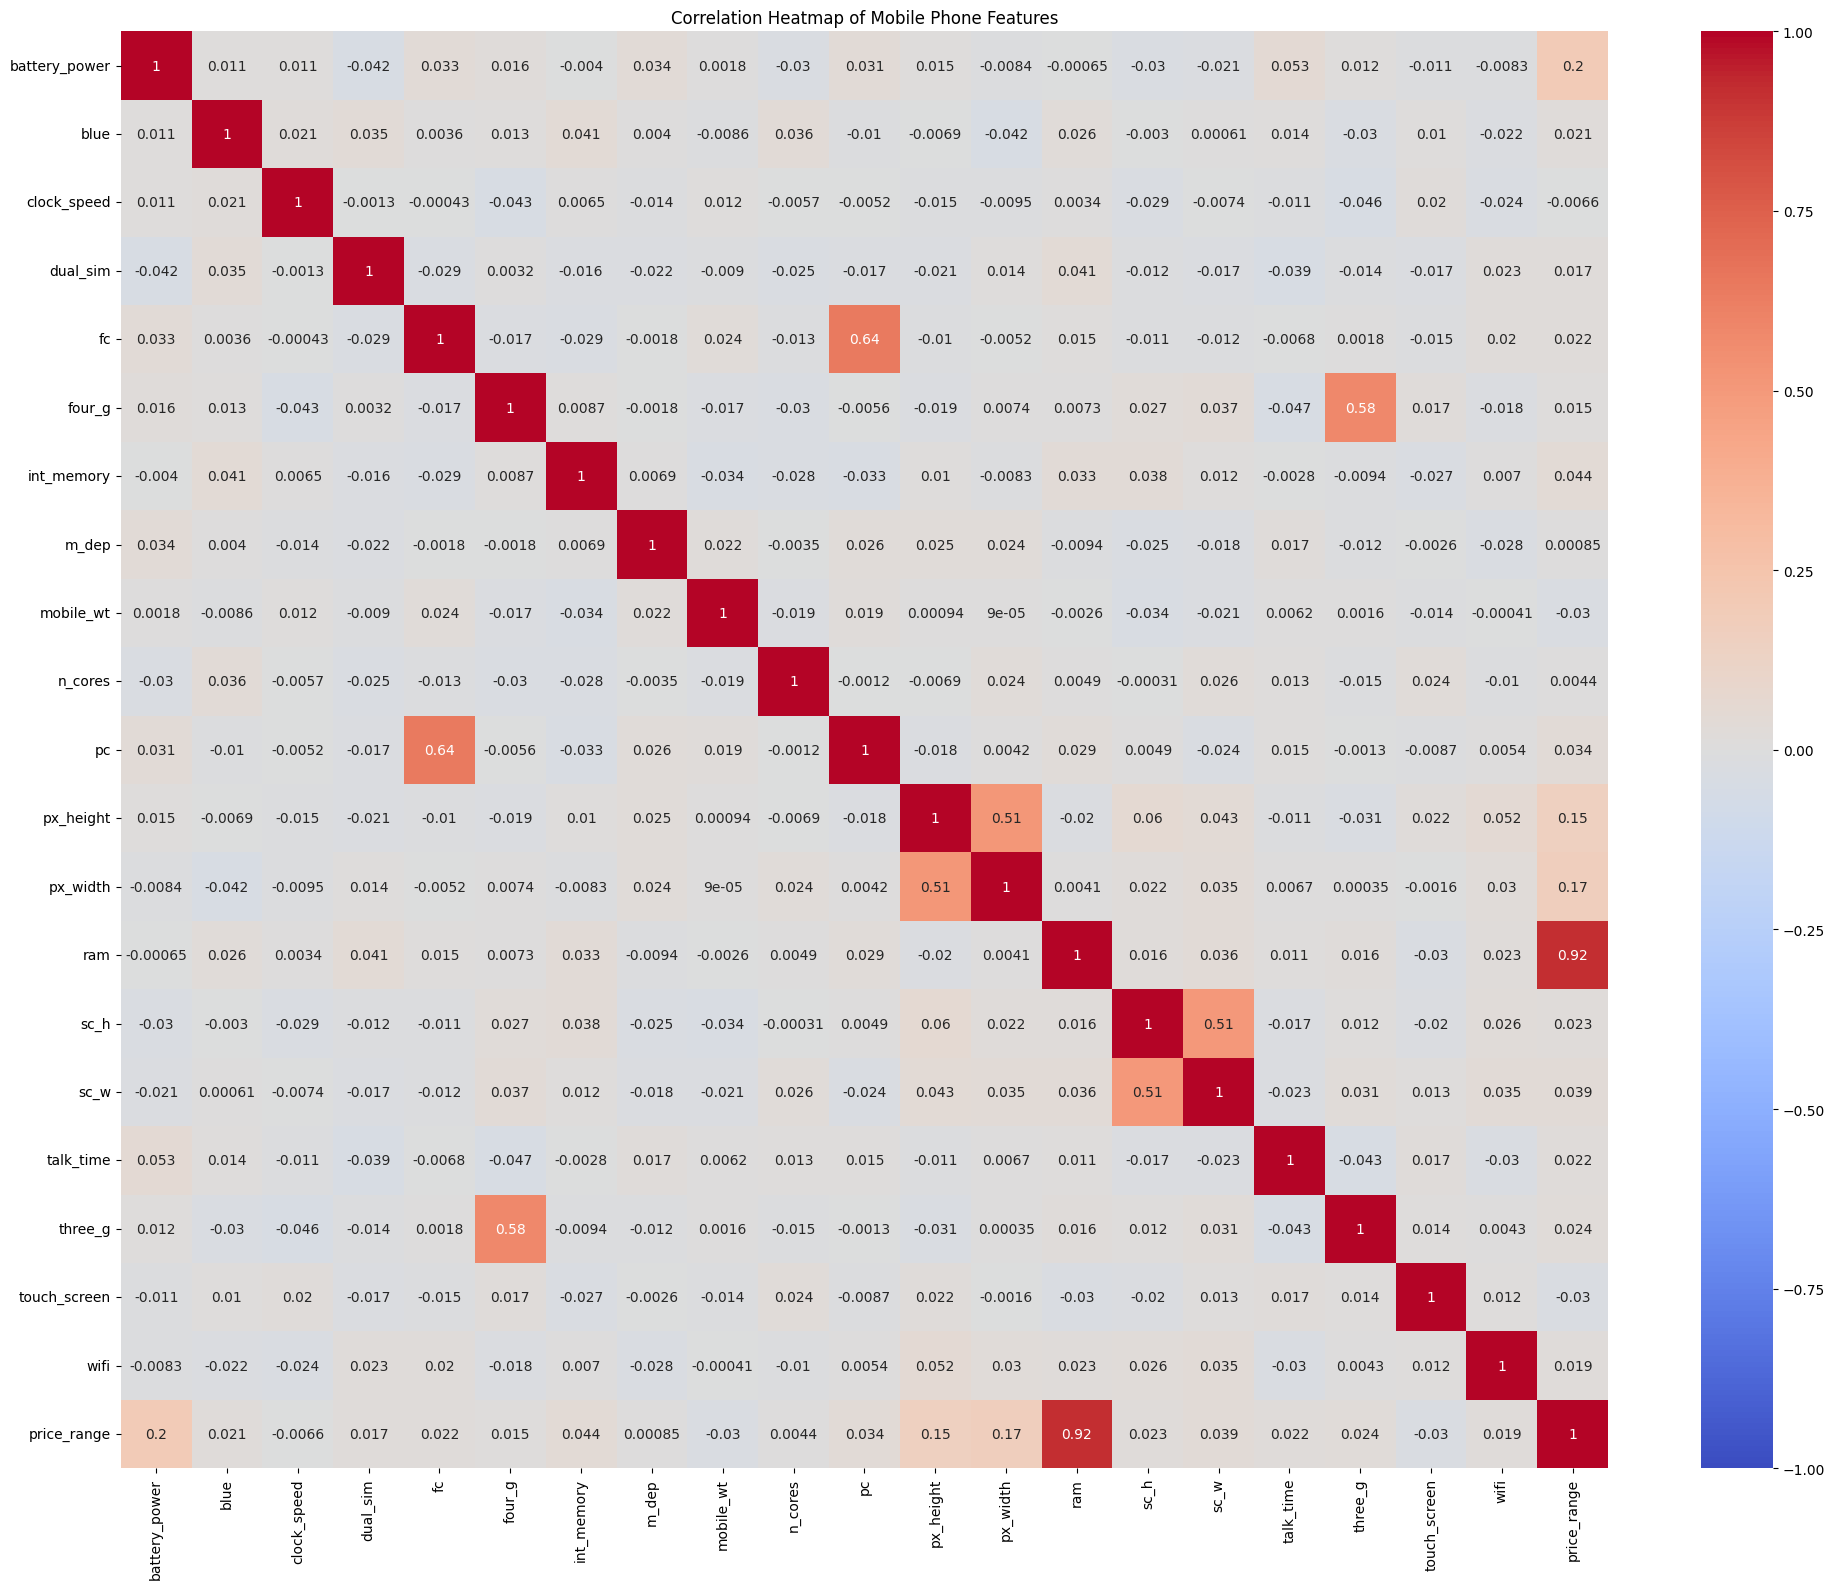

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Mobile Phone Features')
plt.tight_layout()
plt.show()


In [48]:
def get_strongly_correlated_features(corr_matrix, threshold=0.7):
    strong_correlations = []
    corr_values = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                strong_correlations.append((corr_matrix.index[i], corr_matrix.columns[j]))
                corr_values.append(float(corr_matrix.iloc[i, j]))
    
    return strong_correlations, corr_values

strongly_correlated, corr_values = get_strongly_correlated_features(correlation_matrix, 0.4)
list(zip(strongly_correlated, corr_values))


[(('fc', 'pc'), 0.6445952827956328),
 (('four_g', 'three_g'), 0.5842455634172913),
 (('px_height', 'px_width'), 0.5106644191393148),
 (('ram', 'price_range'), 0.9170457362649902),
 (('sc_h', 'sc_w'), 0.5061442083433548)]

**List of highly correlated features:**
 - Front camera resolution (fc) and Primary camera resolution (pc). Seems reasonable. If smartphone has a high resolution front camera, it is likely to have a high resolution primary camera.
 - 4G (four_g) and 3G (three_g). 4G phones have 3G as well.
 - Screen resolution (px_height and px_width). Height tend to be bigger than width and screen overall more likely to have some common resolutions.
 - RAM (ram) and Price Range (price_range). RAM is not a selling point feature but it is neccesary for high phones with high performance. But it seems to be very costly to increase RAM capacity.





In [18]:
features = df.drop(columns=['price_range']).columns.to_list()
bin_cols = [col for col in features if set(df[col].unique()) == {0, 1}]
ordinal_cols = ['sc_h', 'sc_w', 'pc', 'fc', 'n_cores', 'talk_time']
continuous_cols = [col for col in features if col not in bin_cols + ordinal_cols]
target = 'price_range'

print('features: ', features)
print('bin_cols: ', bin_cols)
print('ordinal_cols: ', ordinal_cols)
print('continuous_cols: ', continuous_cols)
print('target: ', target)


features:  ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
bin_cols:  ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
ordinal_cols:  ['sc_h', 'sc_w', 'pc', 'fc', 'n_cores', 'talk_time']
continuous_cols:  ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'px_height', 'px_width', 'ram']
target:  price_range


**Visulize Highly Correlated Features**


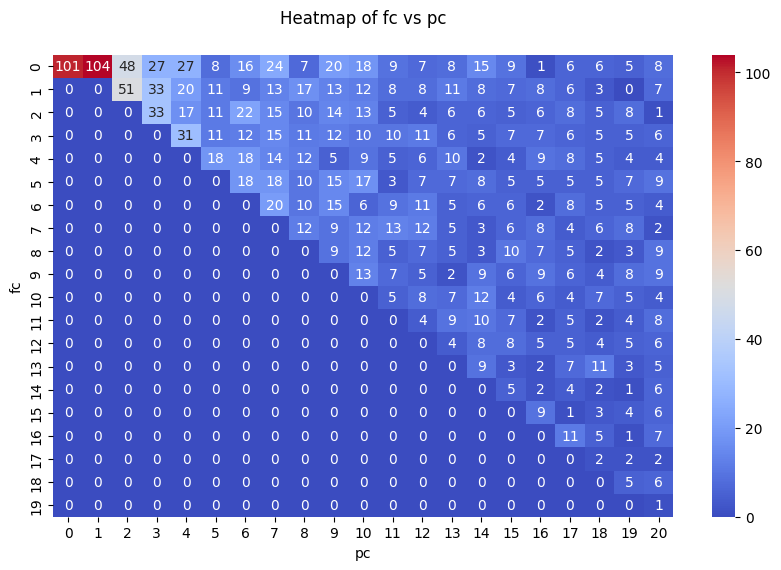

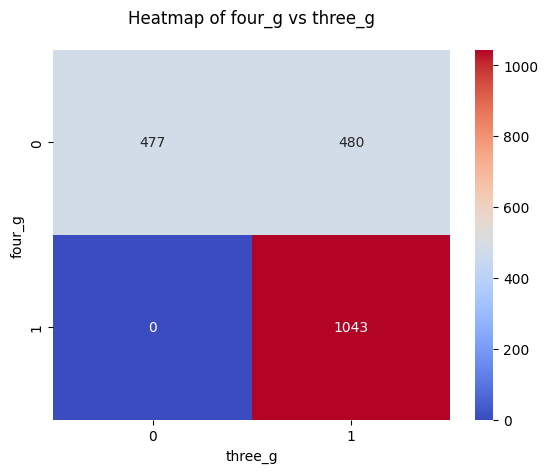

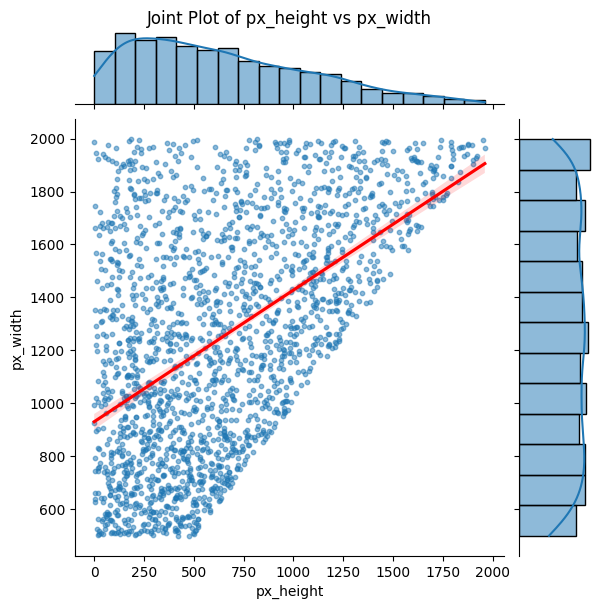

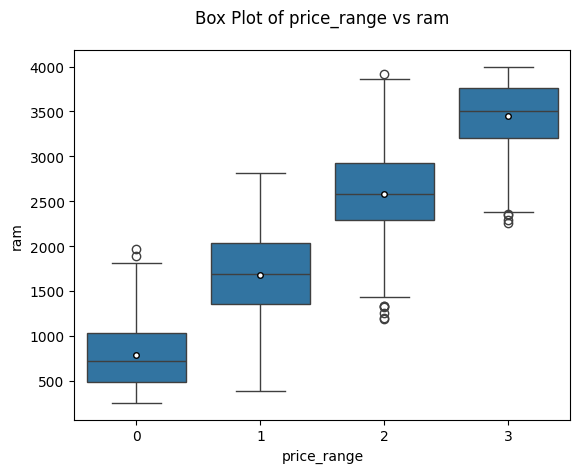

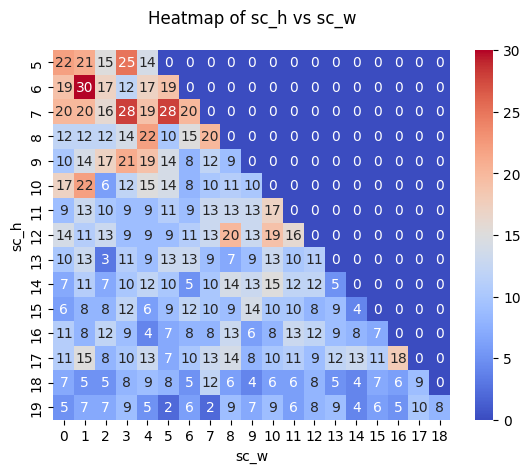

In [27]:
plt.figure(figsize=(10, 6))

for feature_pair in strongly_correlated:
    if len(set(continuous_cols).intersection(feature_pair)) == 2:
        sns.jointplot(x=feature_pair[0], y=feature_pair[1], data=df, kind="reg",
                      scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
        plt.title(f'Joint Plot of {feature_pair[0]} vs {feature_pair[1]}', y=1.2)
        plt.show()
    elif len(set(ordinal_cols + bin_cols + [target]).intersection(feature_pair)) == 2:
        sns.heatmap(pd.crosstab(df[feature_pair[0]], df[feature_pair[1]]), annot=True, cmap='coolwarm', fmt='d')
        plt.title(f'Heatmap of {feature_pair[0]} vs {feature_pair[1]}', y=1.05)
        plt.show()
    else:
        x_feature = set(ordinal_cols + bin_cols + [target]).intersection(feature_pair).pop()
        y_feature = set(continuous_cols).intersection(feature_pair).pop()
        sns.boxplot(x=x_feature, y=y_feature, data=df, showmeans=True,
                    meanprops={'marker':'o',
                                'markerfacecolor':'white', 
                                'markeredgecolor':'black',
                                'markersize':'4'})
        plt.title(f'Box Plot of {x_feature} vs {y_feature}', y=1.05)
        plt.ticklabel_format(style='plain', axis='y')
        plt.show()


Let's takea closer look at correlations between features and target variable.


In [44]:
from scipy.stats import spearmanr

correlations = {}
for column in features:
    corr, other_stats = stats.spearmanr(df[column], df[target])
    correlations[column] = corr

corr_df = pd.DataFrame(list(correlations.items()), columns=['feature', 'correlation'])
corr_df = corr_df.sort_values(by='correlation', ascending=False)

corr_df.style.background_gradient(subset=["correlation"], cmap="coolwarm", vmin=-1, vmax=1)

,feature,correlation
13,ram,0.917080
0,battery_power,0.199991
12,px_width,0.165134
11,px_height,0.131884
6,int_memory,0.044278
10,pc,0.032824
15,sc_w,0.024776
4,fc,0.024167
14,sc_h,0.023727
17,three_g,0.023611


As we stated earlier, RAM is a higly correlated feature.

But also Battery Power, Screen Height and Width have weak positive correlation with price range. It seems logical that for cheaper phones battery capacity and screen size is smaller.


In [31]:
def highlight_significant(col):
    return ['background-color: #ef8a62' if val < 0.05 else '' for val in col]


**Kendall's Tau correlation and ANOVA test (for ordinal/continuous features)**

In [45]:
from scipy.stats import kendalltau, pointbiserialr, chi2_contingency, f_oneway


# Kendall's Tau correlation and ANOVA test (for ordinal/continuous features)
contitious_stats = pd.DataFrame(index=continuous_cols, columns=['kendall_tau', 'kendall_p_value', 'anova_f', 'anova_p_value'])
for feature in continuous_cols:
    # Kendall's Tau correlation
    tau, p_value = kendalltau(df[feature], df[target])
    contitious_stats.loc[feature, 'kendall_tau'] = tau
    contitious_stats.loc[feature, 'kendall_p_value'] = p_value
    
    # ANOVA test
    groups = [group for _, group in df.groupby(target)[feature]]
    f_statistic, anova_p_value = f_oneway(*groups)
    contitious_stats.loc[feature, 'anova_f'] = f_statistic
    contitious_stats.loc[feature, 'anova_p_value'] = anova_p_value
    
    
contitious_stats = contitious_stats.sort_values(by='kendall_tau', ascending=False)
contitious_stats.style \
    .background_gradient(subset=["kendall_tau"], cmap="coolwarm", vmin=-1, vmax=1) \
    .background_gradient(subset=["anova_f"], cmap="coolwarm") \
    .apply(highlight_significant, subset=['kendall_p_value', 'anova_p_value'], axis=1)

,kendall_tau,kendall_p_value,anova_f,anova_p_value
ram,0.791399,0.000000,3520.110824,0.000000
battery_power,0.148461,0.000000,31.598158,0.000000
px_width,0.123132,0.000000,22.620882,0.000000
px_height,0.098565,0.000000,19.484842,0.000000
int_memory,0.033267,0.047796,2.922996,0.032777
m_dep,-0.000241,0.989020,1.500682,0.212459
clock_speed,-0.003844,0.823078,0.493708,0.686675
mobile_wt,-0.022748,0.174312,3.594318,0.013117


Even thought Kendall's Tau correlation and ANOVA test indicates significant results, actual statistical value is high only for RAM.

**Point Biserial correlation and Chi-Square test of independence (for binary/categorical features)**

In [72]:

# Point Biserial correlation and Chi-Square test of independence (for binary/categorical features)
bin_stats = pd.DataFrame(index=bin_cols, columns=['point_biserial_corr', 'point_biserial_p_value', 'chi2_stat', 'chi2_p_value'])
for feature in bin_cols:
    # Point Biserial correlation
    pb_corr, p_value = pointbiserialr(df[feature], df[target])
    bin_stats.loc[feature, 'point_biserial_corr'] = pb_corr
    bin_stats.loc[feature, 'point_biserial_p_value'] = p_value
    
    # Chi-Square test of independence
    contingency_table = pd.crosstab(df[feature], df[target])
    chi_stat, p_value, *_ = chi2_contingency(contingency_table)
    bin_stats.loc[feature, 'chi2_stat'] = chi_stat
    bin_stats.loc[feature, 'chi2_p_value'] = p_value

bin_stats = bin_stats.sort_values(by='point_biserial_corr', ascending=False)
bin_stats.style \
    .background_gradient(subset=['point_biserial_corr'], cmap="coolwarm", vmin=-1, vmax=1) \
    .background_gradient(subset=['chi2_stat'], cmap="coolwarm") \
    .apply(highlight_significant, subset=['point_biserial_p_value', 'chi2_p_value'], axis=1)




,point_biserial_corr,point_biserial_p_value,chi2_stat,chi2_p_value
three_g,0.023611,0.291237,1.373764,0.711696
blue,0.020573,0.357798,1.432143,0.698018
wifi,0.018785,0.401115,0.856168,0.835991
dual_sim,0.017444,0.435560,1.286464,0.732350
four_g,0.014772,0.509104,3.179880,0.364714
touch_screen,-0.030411,0.173992,3.880140,0.274701


Tests show no significant results for binary/categorical features.
